In [164]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [165]:
image_path = "../output_videos/cropped_img.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV_FULL)

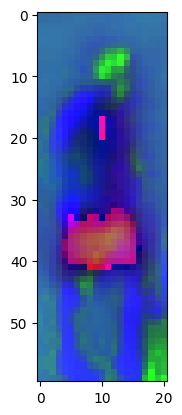

In [166]:
plt.imshow(image)
plt.show()

# Take the top half of the image

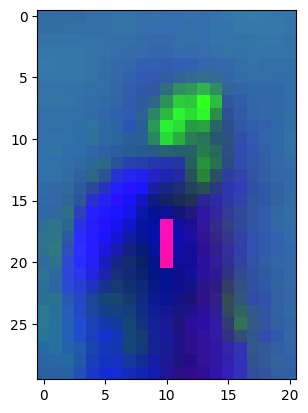

In [167]:
top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

# Cluster image into two clusters to get background and tshirt colours seperately

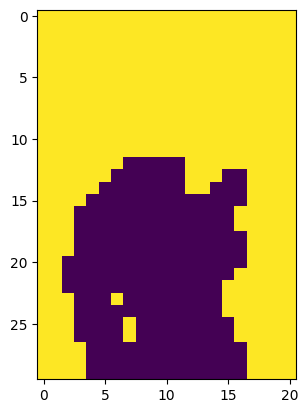

In [168]:
# Reshape img into a 2d array
image_2d = top_half_image.reshape(-1, 3)

# perform k-means clustering w 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# get the cluster labels
labels = kmeans.labels_

# reshape the labels into the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# display the clustered image
plt.imshow(clustered_image)
plt.show()

In [169]:
# Get most abundant class in corners to work out which class is the background
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
background_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(background_cluster)

1


In [170]:
player_cluster = 1 - background_cluster
print(player_cluster)

0


In [178]:
# Check rgb values match up with image to check clustering
hsv_value = kmeans.cluster_centers_[player_cluster]
hsv_value = np.uint8([[hsv_value]])
rgb_value = cv2.cvtColor(hsv_value, cv2.COLOR_HSV2RGB)
print(rgb_value)

[[[163 166 143]]]
